# Importing  libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Importing dataset and reading the specified columns (Age, Fare, Survived) 

In [62]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [63]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


# Handling missing value

In [64]:
# Calculate the percentage of missing values in each column of the DataFrame 'df'
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [65]:
# Storing all the input columns in variable 'X' and target column in variable 'y'

X = df.drop(columns=["Survived"])
y = df['Survived']

In [66]:
#  Dividing dataset into two subsets: one for training the model (X_train, y_train) and the other for testing its 
# performance (y_train, y_test), helping evaluate how well the model generalizes to new unseen data.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [67]:
# Shape of training and testing data

X_train.shape, X_test.shape

((712, 2), (179, 2))

In [68]:
# Create new columns 'Age_imputed' in the training and testing datasets, initially copying values from 'Age'
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [69]:
# Shape of training and testing data

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [70]:
# Impute missing values in the 'Age_imputed' column of the training dataset from the existing non-null values of the X_train['Age'] column
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

# Impute missing values in the 'Age_imputed' column of the testing dataset from the existing non-null values of the X_test['Age'] column
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [71]:
# Generating random samples from the non-null X_train['Age'] column to impute missing values in 'Age_imputed'
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([ 5.  , 35.  , 23.  , 40.  , 41.  , 29.  , 20.  , 46.  , 58.  ,
       65.  , 15.  , 54.  , 34.  , 17.  , 25.  , 13.  ,  8.  , 21.  ,
       25.  , 42.  , 24.  , 28.  , 39.  , 34.  , 39.  , 21.  , 25.  ,
       21.  ,  8.  , 20.  ,  2.  , 32.  , 60.  , 22.  , 26.  , 40.  ,
       27.  ,  0.67, 45.5 , 44.  , 50.  , 45.5 , 33.  , 18.  , 36.  ,
       40.  , 30.  , 20.  , 41.  , 14.  , 37.  , 31.  , 22.  , 30.  ,
       36.  , 42.  , 57.  , 31.  , 47.  , 19.  , 25.  , 18.  , 36.  ,
       34.  , 22.  , 18.  , 30.  , 36.  , 30.  , 27.  , 31.  , 25.  ,
       19.  , 26.  ,  4.  , 16.  , 19.  , 25.  , 25.  ,  9.  , 42.  ,
       45.  ,  9.  , 22.  , 34.  , 16.  , 51.  , 33.  , 22.  , 43.  ,
       29.  , 50.  , 64.  , 36.  , 23.  , 22.  , 28.  , 42.  , 30.  ,
       24.  , 21.  , 22.  , 14.  , 28.  , 27.  , 24.  , 16.  , 34.  ,
       20.  , 19.  ,  0.75, 22.  , 54.  , 16.  , 30.  , 50.  , 48.  ,
       31.  , 51.  , 27.  , 27.  , 52.  , 32.  , 51.  , 25.  , 28.  ,
       43.  , 25.  ,

In [72]:
# Generating random samples from the non-null X_test['Age'] column to impute missing values in 'Age_imputed'
X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

array([17. , 21. , 21. , 48. , 38. , 24.5, 26. , 47. , 25. , 18. , 35. ,
       19. , 18. , 18. , 44. ,  1. , 25. , 30. , 37. , 39. , 65. , 63. ,
       32. , 33. ,  1. , 20.5, 28. , 10. , 18. ])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


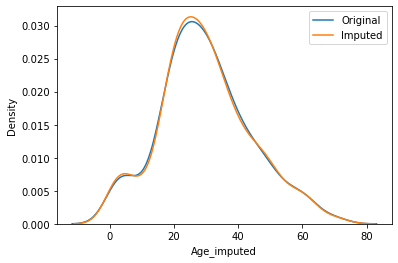

In [73]:
# Create a density plot for the 'Age' column in the training data with a label 'Original'
sns.distplot(X_train['Age'], label='Original', hist=False)

# Create a density plot for the 'Age_imputed' column in the training data with a label 'Imputed'
sns.distplot(X_train['Age_imputed'], label='Imputed', hist=False)

# Add a legend to the plot to distinguish between 'Original' and 'Imputed'
plt.legend()

# Display the plot
plt.show()

In [74]:
# Print the variance of the 'Age' column in the training data (original variable)
print('Original variable variance: ', X_train['Age'].var())

# Print the variance of the 'Age_imputed' column in the training data (after random imputation)
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  204.62364836339867


<AxesSubplot:>

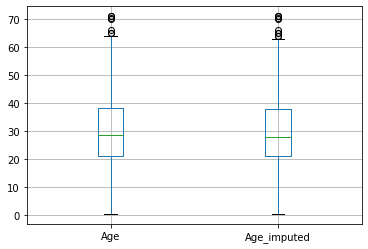

In [75]:
# Create a boxplot to visualize the distribution of 'Age' and 'Age_imputed' columns in the training data
X_train[['Age', 'Age_imputed']].boxplot()

As we can see, the distribution, variance, and boxplots of the original 'Age' column and the imputed 'Age' column are almost the same, which is a positive indication.